In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [2]:
np.random.seed(42)

# Part (a)

We have
$$\mathbb P(Z=z|Y=y) = \frac{\mathbb P(Z=z,Y=y)}{\mathbb P(Y=y)}
= \frac{\sum_x \mathbb P(Z=z,Y=y,X=x)}{\mathbb P(Y=y)}
= \sum_x \mathbb P(Z=z|X=x, Y=y) \frac{\mathbb P(Y=y,X=x)}{\mathbb P(Y=y)}.$$
The joint distribution for $X,Y$ is given by the following table:
||$Y=0$|$Y=1$|
|---|---|---|
$X=0$|$\frac{e^2}{2(1+e^2)}$|$\frac{1}{2(1+e^2)}$|
$X=1$|$\frac{1}{2(1+e^2)}$|$\frac{e^2}{2(1+e^2)}$|

Thus we see that $Y$ is a $\mathrm{Bernoulli}(1/2)$ random variable and we can read off the joint distribution for $X,Y$. We have that $Z\sim \mathrm{Bernoulli}\left(\frac{1}{1+e^2}\right)$ when $x+y=0$, $Z\sim \mathrm{Bernoulli}\left(\frac{1}{2}\right)$ when $x+y=1$, and $Z\sim \mathrm{Bernoulli}\left(\frac{e^2}{1+e^2}\right)$ when $x+y=2$. There are now four cases to deal with.

1. We have $\mathbb P(Z=0|Y=0)=\mathbb P(Z=0 | X = 0, Y=0) \frac{\mathbb P(Y=0, X=0)}{\mathbb P(Y = 0)} + 
\mathbb P(Z=0 | X = 1, Y=0) \frac{\mathbb P(Y=0, X=1)}{\mathbb P(Y = 0)}=\frac{e^4}{(1+e^2)^2}+\frac{1}{2(1+e^2)}=\frac{2e^4+e^2+1}{2(1+e^2)^2}.$
2. We have $\mathbb P(Z=0|Y=1)=\mathbb P(Z=0 | X = 0, Y=1) \frac{\mathbb P(Y=1, X=0)}{\mathbb P(Y = 1)} + 
\mathbb P(Z=0 | X = 1, Y=1) \frac{\mathbb P(Y=1, X=1)}{\mathbb P(Y = 1)}=\frac{1}{2(1+e^2)} + \frac{e^2}{(1+e^2)^2}=\frac{3e^2+1}{2(1+e^2)^2}.$
3. We have $\mathbb P(Z=1|Y=0)=\mathbb P(Z=1 | X = 0, Y=0) \frac{\mathbb P(Y=0, X=0)}{\mathbb P(Y = 0)} + 
\mathbb P(Z=1 | X = 1, Y=0) \frac{\mathbb P(Y=0, X=1)}{\mathbb P(Y = 0)}=\frac{e^2}{(1+e^2)^2}+\frac{1}{2(1+e^2)}=\frac{3e^2+1}{2(1+e^2)^2}.$
4. We have $\mathbb P(Z=1|Y=1)=\mathbb P(Z=1 | X = 0, Y=1) \frac{\mathbb P(Y=1, X=0)}{\mathbb P(Y = 1)} + 
\mathbb P(Z=1 | X = 1, Y=1) \frac{\mathbb P(Y=1, X=1)}{\mathbb P(Y = 1)}=\frac{1}{2(1+e^2)}+\frac{e^4}{(1+e^2)^2}=\frac{2e^4+e^2+1}{2(1+e^2)^2}.$

An expression for $\mathbb P(Z=z | Y=y)$ is
$$\delta_0(y)\left(\frac{2e^4+e^2+1}{2(1+e^2)^2}\delta_0(z) + \frac{3e^2+1}{2(1+e^2)^2}\delta_1(z)\right)+
\delta_1(y)\left(\frac{3e^2+1}{2(1+e^2)^2}\delta_0(z) + \frac{2e^4+e^2+1}{2(1+e^2)^2}\delta_1(z)\right).$$

# Part (b)

Now let's compute $\mathbb P(Z=1 | Y=1)$ by simulation and compare to the theoretical value computed in part (a).

In [3]:
print(f'True value for P(Z=1|Y=1): {(2*np.e**4 + np.e**2+1)/(2*(1+np.e**2)**2):.4f}')

True value for P(Z=1|Y=1): 0.8354


In [4]:
f = lambda x: np.e**(4*x-2) / (1 + np.e**(4*x-2))

In [5]:
g = lambda x, y: np.e**(2*(x+y)-2)/(1 + np.e**(2*(x+y)-2))

We use the functions $f$ and $g$ just created to simulate $Y$ from $X$ and $Z$ from $Y$.

In [6]:
def simulate(n):
    """
        Create X as a Bernoulli random variable.
        Create Y as a Bernoulli random variable dependent
            on the value of X.
        Create Z as a Bernoulli random variable dependent
            on the values of X and Y.
    """
    X = bernoulli.rvs(p=1/2, size=n)
    Y = np.array([bernoulli.rvs(p=f(x), size=1)
                  for x in X]).reshape(-1)
    Z = np.array([bernoulli.rvs(p=g(x,y), size=1)
                  for x,y in zip(X,Y)]).reshape(-1)
    
    return X, Y, Z

In [7]:
def calc_cond_prob(Y, Z):
    """
        Calculate the conditional probability
        P(Z=1|Y=1).
    """
    return np.mean(Y*Z) / np.mean(Y)

In [8]:
probs = []

In [9]:
for n in range(0,10000,100):
    X, Y, Z = simulate(n)
    prob = calc_cond_prob(Y, Z)
    probs.append(prob)

/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, '$P(Z=1|Y=1)$')

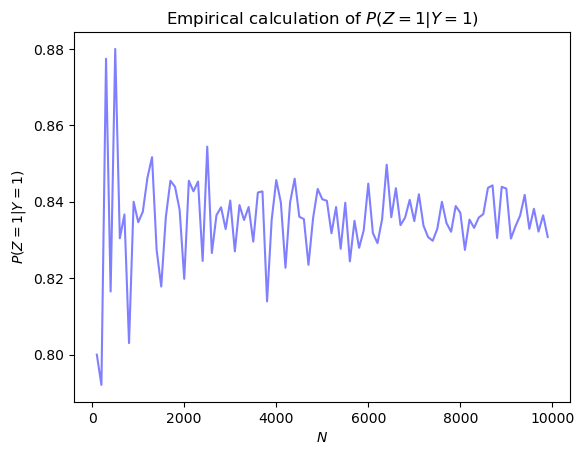

In [10]:
plt.plot(range(0,10000,100), probs, color='blue', alpha=0.5)
plt.title(r"Empirical calculation of $P(Z=1|Y=1)$")
plt.xlabel(r'$N$')
plt.ylabel(r'$P(Z=1|Y=1)$')

In [11]:
X, Y, Z = simulate(100000)
prob = calc_cond_prob(Y, Z)

In [12]:
print(f'Empirical value for P(Z=1|Y=1): {prob:.4f}')

Empirical value for P(Z=1|Y=1): 0.8352


# Part (c)

By definition, $\mathbb P(Z=1|Y:=y)=\sum_x f(x)f(1|x,y)$. There are two cases to consider
1. $\mathbb P(Z=1|Y:=0)= \mathbb P(X=0) \mathbb P(Z=1|X=0,Y=0) + \mathbb P(X=1) \mathbb P(Z=1|X=1,Y=0)=\frac{3+e^2}{4(1+e^2)}.$
1. $\mathbb P(Z=1|Y:=1)= \mathbb P(X=0) \mathbb P(Z=1|X=0,Y=1) + \mathbb P(X=1) \mathbb P(Z=1|X=1,Y=1)=\frac{3e^2+1}{4(1+e^2)}.$

Thus $P(Z=1|Y:=y)=\delta_0(y)\frac{3+e^2}{4(1+e^2)} + \delta_1(y)\frac{3e^2+1}{4(1+e^2)}$.

# Part (d)

Now let's compute $\mathbb P(Z=1|Y:=1)$ by simulation and compare to the theoretical value computed in part (c).

In [13]:
print(f'True value for P(Z=1|Y:=1): {(3*np.e**2+1)/(4*(1+np.e**2)):.4f}')

True value for P(Z=1|Y:=1): 0.6904


In [15]:
def simulate_with_intervention(n):
    """
        Create X as a Bernoulli random variable.
        Fix Y.
        Create Z as a Bernoulli random variable dependent
            on the values of X and Y.
    """
    X = bernoulli.rvs(p=1/2, size=n)
    Y = np.ones(X.shape)
    Z = np.array([bernoulli.rvs(p=g(x,y), size=1)
                  for x,y in zip(X,Y)]).reshape(-1)
    
    return X, Y, Z

In [16]:
def calc_cond_prob_with_intervention(Y, Z):
    """
        Calculate the conditional probability
        P(Z=1|Y:=1).
    """
    return np.mean(Z)

In [17]:
probs = []

In [18]:
for n in range(0,10000,100):
    X, Y, Z = simulate_with_intervention(n)
    prob = calc_cond_prob_with_intervention(Y, Z)
    probs.append(prob)

Text(0, 0.5, '$P(Z=1|Y:=1)$')

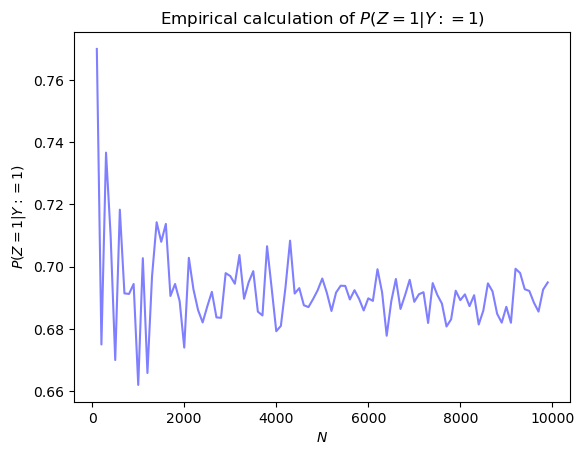

In [19]:
plt.plot(range(0,10000,100), probs, color='blue', alpha=0.5)
plt.title(r"Empirical calculation of $P(Z=1|Y:=1)$")
plt.xlabel(r'$N$')
plt.ylabel(r'$P(Z=1|Y:=1)$')

In [20]:
X, Y, Z = simulate_with_intervention(100000)
prob = calc_cond_prob_with_intervention(Y, Z)

In [21]:
print(f'Empirical value for P(Z=1|Y:=1): {prob:.4f}')

Empirical value for P(Z=1|Y:=1): 0.6923


We again see that the theoretical and empirical values are quite close.